In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lee las dos bases de datos que empiezan con IPH_robos_2021 y IPH_robos_2024
df1 = pd.read_excel("data/fechas_corregidas.xlsx")
df2 = pd.read_excel("data/IPH_robos_ene-ago-2025_tecmty.xlsx")


In [3]:
# En df2 cambia el nombre de la columna VOLENCIA a VIOLENCIA
df2.rename(columns={'VOLENCIA': 'VIOLENCIA'}, inplace=True)

In [4]:
# Une las dos bases de datos
df = pd.concat([df1, df2], ignore_index=True)

In [5]:
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,dia
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,NaN
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,NaN
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,NaN
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,NaN
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,NaN


In [6]:
df.dtypes

FOLIO                 int64
FECHA        datetime64[ns]
HORA                  int64
MINUTO                int64
TIPO                 object
VIOLENCIA            object
LATITUD             float64
LONGITUD            float64
DISTRITO             object
CUADRANTE             int64
dia                 float64
dtype: object

In [7]:
# Eliminar la columna de dia
df.drop(columns=['dia'], inplace=True)


In [8]:
df.isnull().sum()

FOLIO        0
FECHA        0
HORA         0
MINUTO       0
TIPO         0
VIOLENCIA    0
LATITUD      0
LONGITUD     0
DISTRITO     0
CUADRANTE    0
dtype: int64

In [9]:
df.duplicated(subset=['FOLIO']).sum()

np.int64(726)

In [10]:
df[df.duplicated(subset=['FOLIO'], keep=False)].sort_values(by='FOLIO')

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
6201,0,2022-07-28,18,12,ROBO A CASA HABITACION,NO,28.619656,-106.105090,Diana,32
6190,0,2022-07-27,15,19,ROBO DE VEHICULO,NO,28.645297,-106.013942,Morelos,52
6191,0,2022-07-27,20,43,ROBO A NEGOCIO,SI,28.625491,-106.061615,Zapata,70
6192,0,2022-07-28,3,41,ROBO A CASA HABITACION,SI,28.723154,-106.108071,Colón,14
6193,0,2022-07-28,8,3,ROBO DE VEHICULO,NO,28.722476,-106.152428,Colón,12
...,...,...,...,...,...,...,...,...,...,...
5735,0,2022-04-29,13,48,ROBO A NEGOCIO,SI,28.603076,-106.037704,Morelos,55
7995,1269942,2022-10-23,0,28,ROBO A NEGOCIO,SI,28.651858,-106.062341,Ángel,35
12134,1269942,2025-08-02,4,16,ROBO A NEGOCIO,SI,28.725176,-106.122496,Colón,13
8655,1342626,2021-03-30,15,8,ROBO A NEGOCIO,NO,28.730855,-106.113343,Colón,14


In [11]:
df['HORA'].describe()

count    12266.000000
mean        15.769933
std         17.883901
min          0.000000
25%          8.000000
50%         12.000000
75%         18.000000
max         99.000000
Name: HORA, dtype: float64

In [12]:
df['MINUTO'].describe()

count    12266.000000
mean        31.759498
std         21.877397
min          0.000000
25%         15.000000
50%         30.000000
75%         46.000000
max         99.000000
Name: MINUTO, dtype: float64

In [13]:
df['TIPO'].describe()

count              12266
unique                 3
top       ROBO A NEGOCIO
freq                5610
Name: TIPO, dtype: object

In [14]:
df['TIPO'].unique()

array(['ROBO A CASA HABITACION', 'ROBO DE VEHICULO', 'ROBO A NEGOCIO'],
      dtype=object)

In [15]:
df['VIOLENCIA'].unique()

array(['NO', 'SI'], dtype=object)

In [16]:
df['AÑO'] = pd.DatetimeIndex(df['FECHA']).year
df['MES'] = pd.DatetimeIndex(df['FECHA']).month
df['DIA'] = pd.DatetimeIndex(df['FECHA']).day
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,2024,1,1
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,2024,1,1
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,2024,1,1
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,2024,1,1
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,2024,1,1


In [17]:
df[df['TIPO'] == 'ROBO A NEGOCIO'].groupby('DISTRITO').size().sort_values(ascending=False)

DISTRITO
Villa      1304
Colón      1123
Morelos    1114
Zapata     1024
Diana       579
Ángel       466
dtype: int64

In [18]:
df.groupby(['DISTRITO', 'TIPO']).size().unstack(fill_value=0)

TIPO,ROBO A CASA HABITACION,ROBO A NEGOCIO,ROBO DE VEHICULO
DISTRITO,,,
Colón,633,1123,800
Diana,180,579,285
Morelos,1068,1114,782
Villa,601,1304,782
Zapata,520,1024,630
Ángel,83,466,292


<Axes: xlabel='DISTRITO', ylabel='TOTAL'>

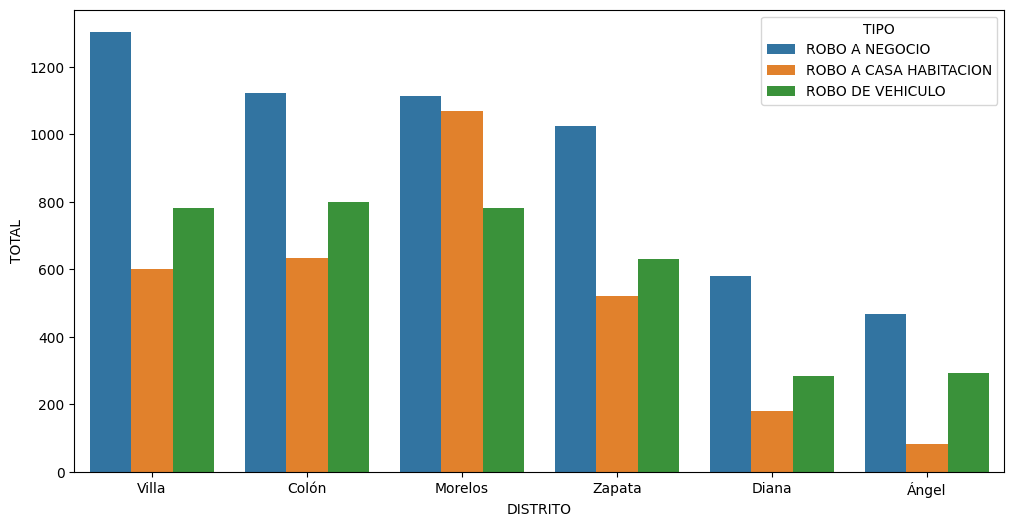

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['DISTRITO', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False).head(20), x='DISTRITO', y='TOTAL', hue='TIPO')

Text(0.5, 1.0, 'Total de robos por mes y tipo')

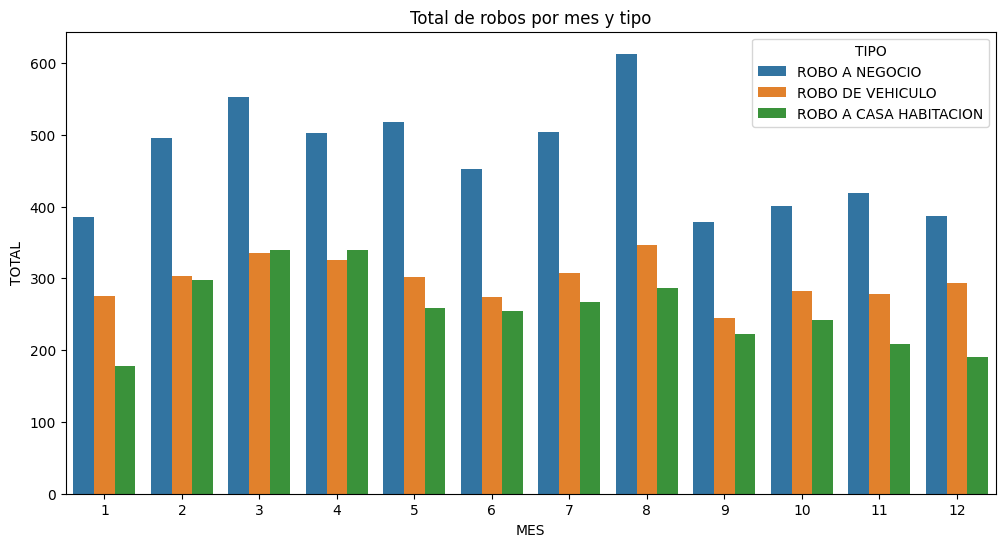

In [20]:
# Agrupamos por MES y TIPO y contamos el total de registros y graficamos un barplot
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['MES', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='MES', y='TOTAL', hue='TIPO')
plt.title('Total de robos por mes y tipo')

Text(0.5, 1.0, 'Total de robos por hora y tipo')

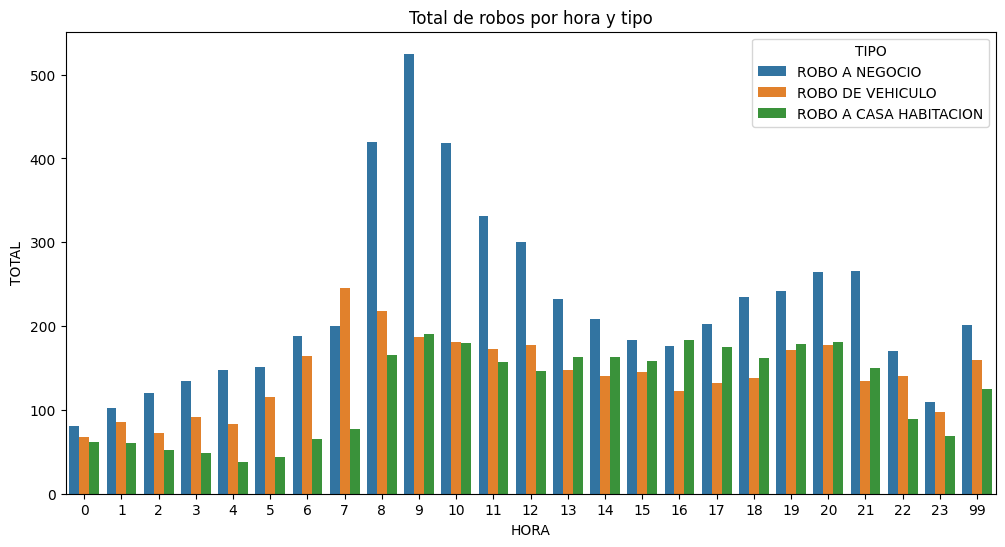

In [21]:
# Agrupamos por HORA y TIPO y contamos el total de registros y graficamos un barplot
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['HORA', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='HORA', y='TOTAL', hue='TIPO')
plt.title('Total de robos por hora y tipo')

In [22]:
df['VIOLENCIA'].value_counts()

VIOLENCIA
NO    10248
SI     2018
Name: count, dtype: int64

Text(0.5, 1.0, 'Total de robos por dia de la semana y tipo')

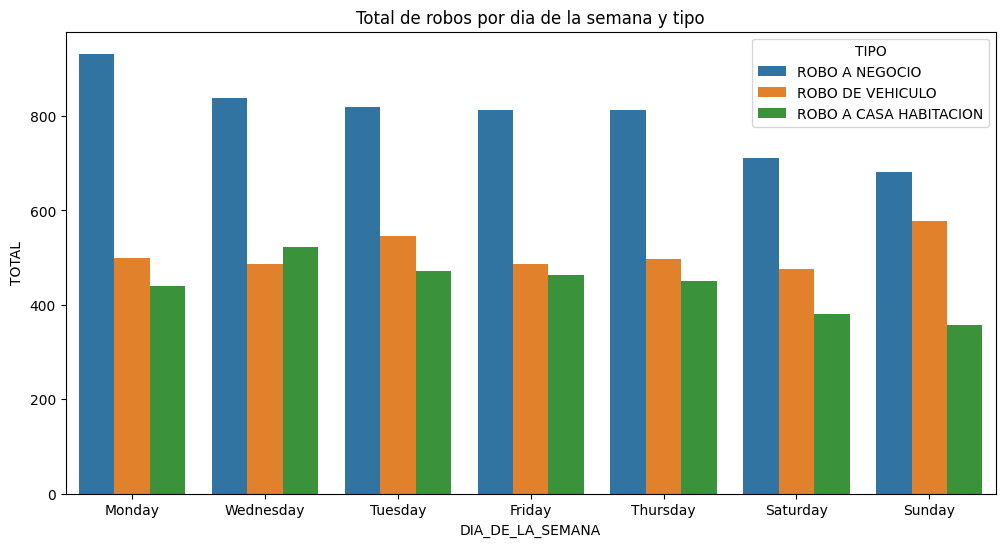

In [23]:
df['DIA_DE_LA_SEMANA'] = df['FECHA'].dt.day_name()
# Agrupar DIA DE LA SEMANA y TIPO y contamos el total de registros y graficamos un barplot
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['DIA_DE_LA_SEMANA', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='DIA_DE_LA_SEMANA', y='TOTAL', hue='TIPO')
plt.title('Total de robos por dia de la semana y tipo')

Text(0.5, 1.0, 'Total de robos por hora y violencia')

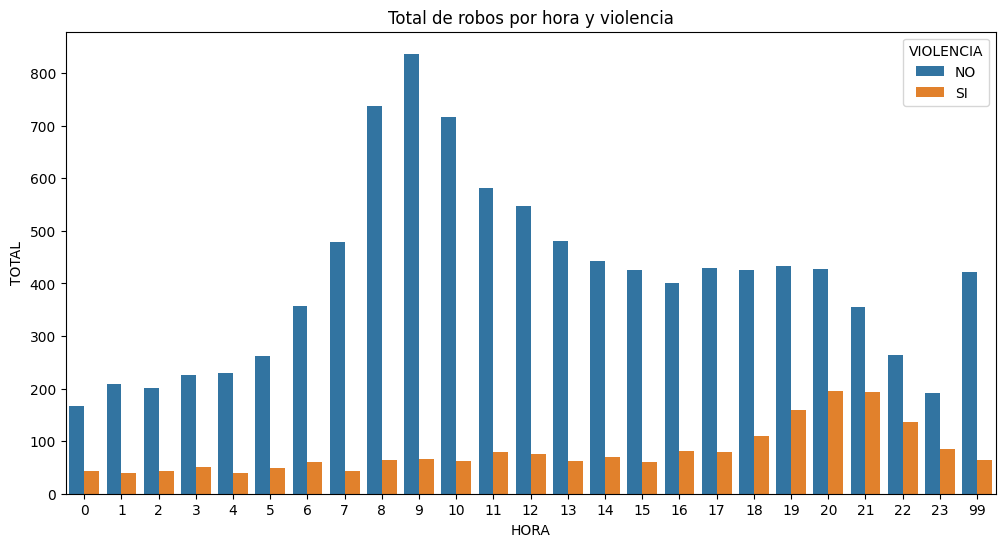

In [24]:
# Agrupar HORA y VIOLENCIA y contamos el total de registros y graficamos un barplot
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['HORA', 'VIOLENCIA']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='HORA', y='TOTAL', hue='VIOLENCIA')
plt.title('Total de robos por hora y violencia')

In [25]:
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA,DIA_DE_LA_SEMANA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,2024,1,1,Monday
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,2024,1,1,Monday
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,2024,1,1,Monday
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,2024,1,1,Monday
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,2024,1,1,Monday


In [26]:
df.columns

Index(['FOLIO', 'FECHA', 'HORA', 'MINUTO', 'TIPO', 'VIOLENCIA', 'LATITUD',
       'LONGITUD', 'DISTRITO', 'CUADRANTE', 'AÑO', 'MES', 'DIA',
       'DIA_DE_LA_SEMANA'],
      dtype='object')

In [27]:
# Dividir el df por tipo de robo y guardarlos en diferentes dataframes
df_negocio = df[df['TIPO'] == 'ROBO A NEGOCIO']
df_casa = df[df['TIPO'] == 'ROBO A CASA HABITACION']
df_calle = df[df['TIPO'] == 'ROBO DE VEHICULO']

In [28]:
# Asegurar que existe la columna MES
df['MES'] = pd.DatetimeIndex(df['FECHA']).month

# Totales por CUADRANTE y MES en el df completo
cuad_mes = df.groupby(['CUADRANTE', 'MES']).size().reset_index(name='TOTAL_POR_CUADRANTE_MES')

# Ranking por MES (1 = cuadrante con más robos ese mes)
cuad_mes['RANK_CUADRANTE_MES'] = cuad_mes.groupby('MES')['TOTAL_POR_CUADRANTE_MES'] \
                                         .rank(method='dense', ascending=False).astype(int)

# Fusionar (merge) esos totales y ranks en cada dataframe específico
df_negocio = df_negocio.merge(cuad_mes, on=['CUADRANTE', 'MES'], how='left')
df_casa    = df_casa.merge(cuad_mes,    on=['CUADRANTE', 'MES'], how='left')
df_calle   = df_calle.merge(cuad_mes,   on=['CUADRANTE', 'MES'], how='left')




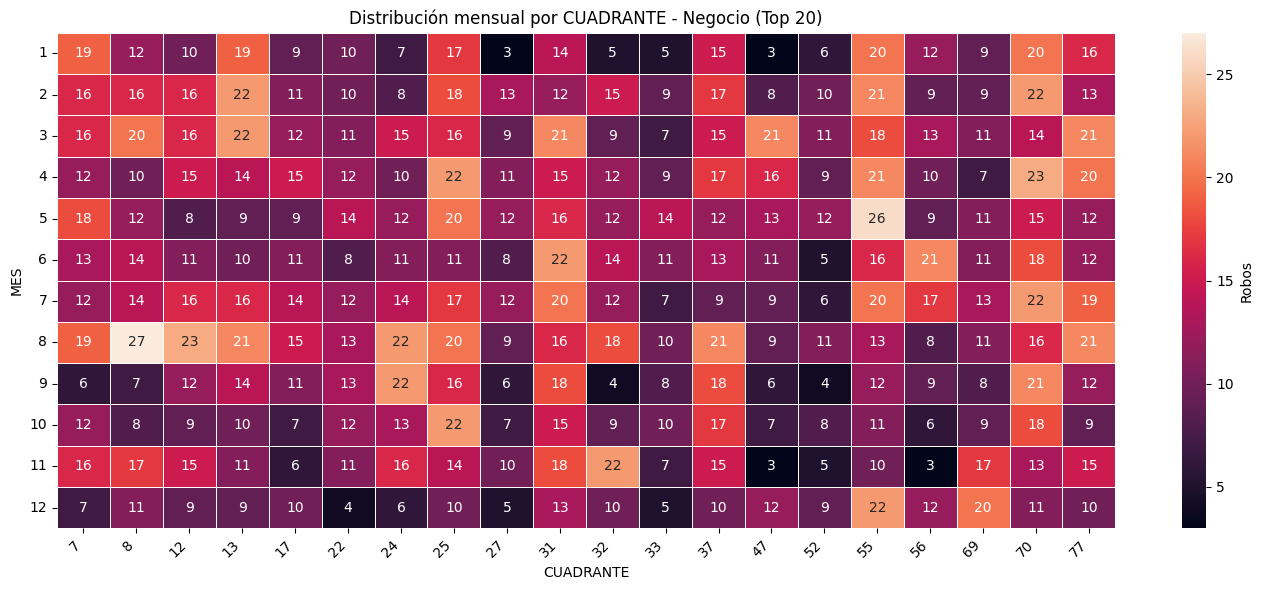

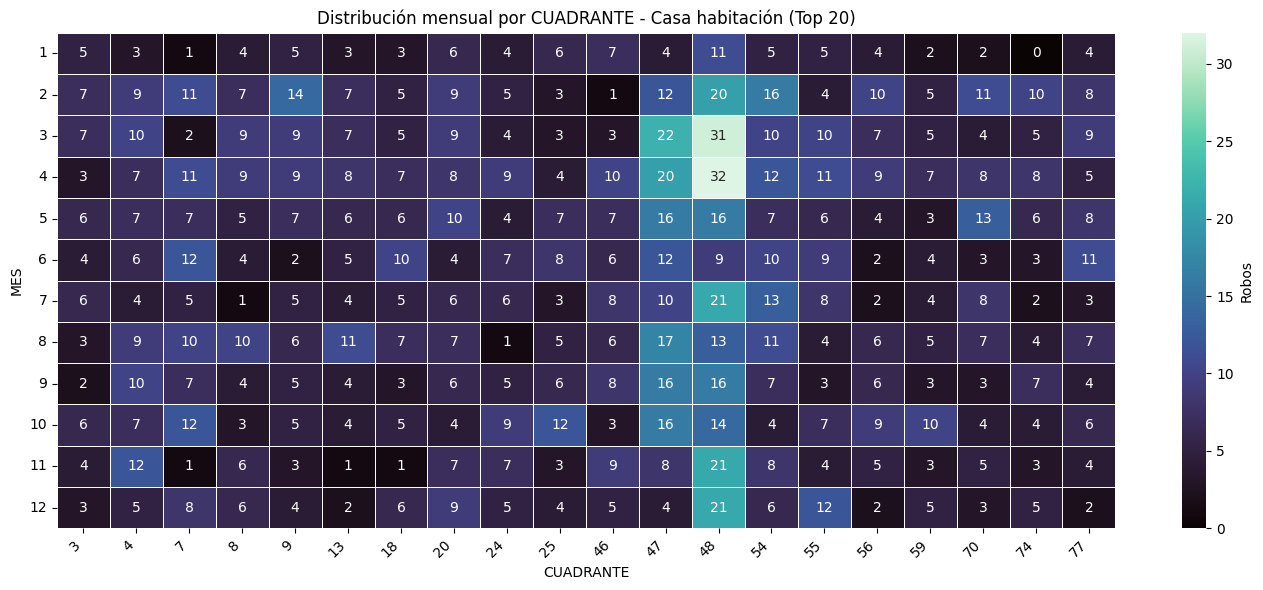

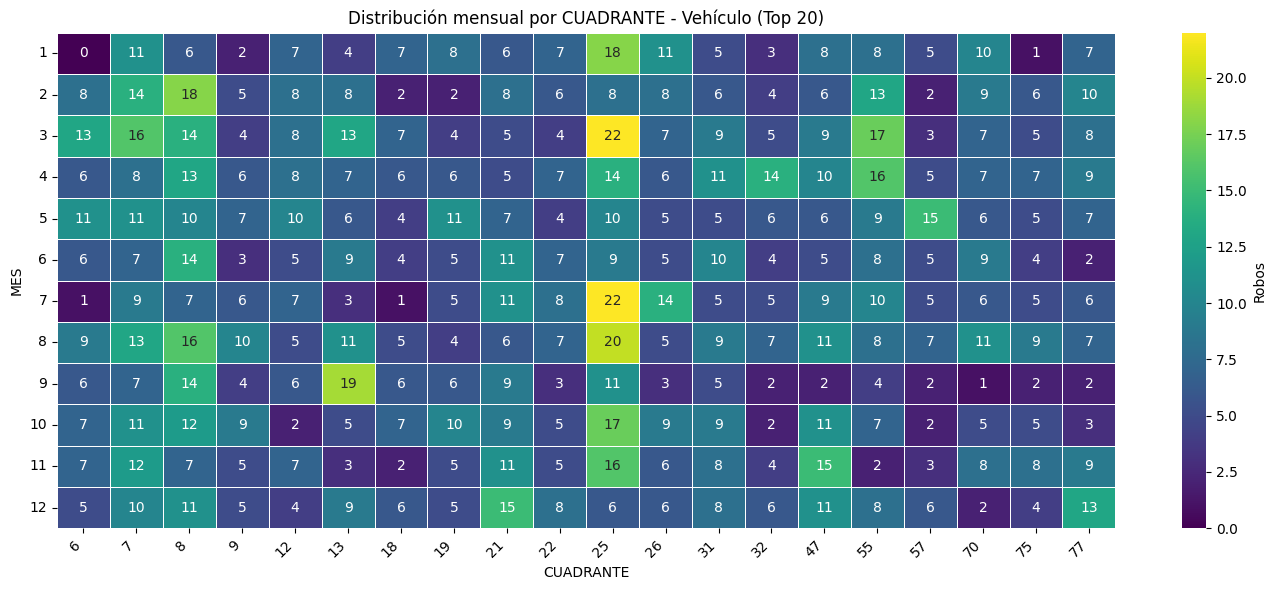

In [29]:
def plot_monthly_heatmap(df_sub, nombre, top_n=20, cmap='rocket'):
    # Totales MES x CUADRANTE (usar sólo top_n cuadrantes por volumen)
    pivot = df_sub.groupby(['MES','CUADRANTE']).size().reset_index(name='TOTAL')
    top_cuads = df_sub['CUADRANTE'].value_counts().dropna().head(top_n).index.tolist()
    pivot = pivot[pivot['CUADRANTE'].isin(top_cuads)]

    # Pivotar para heatmap: filas = MES (1..12), columnas = CUADRANTE
    heat = pivot.pivot(index='MES', columns='CUADRANTE', values='TOTAL').fillna(0)
    heat = heat.reindex(range(1,13)).fillna(0)  # asegurar meses 1..12

    plt.figure(figsize=(14,6))
    sns.heatmap(heat, cmap=cmap, annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label':'Robos'})
    plt.title(f'Distribución mensual por CUADRANTE - {nombre} (Top {top_n})')
    plt.xlabel('CUADRANTE')
    plt.ylabel('MES')
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Generar una gráfica (heatmap mensual) para cada df
plot_monthly_heatmap(df_negocio, 'Negocio', top_n=20, cmap='rocket')
plot_monthly_heatmap(df_casa,    'Casa habitación', top_n=20, cmap='mako')
plot_monthly_heatmap(df_calle,   'Vehículo', top_n=20, cmap='viridis')

def plot_monthly_heatmap(df_sub, nombre, top_n=20, cmap='rocket'):
    # Totales MES x CUADRANTE (usar sólo top_n cuadrantes por volumen)
    pivot = df_sub.groupby(['MES','CUADRANTE']).size().reset_index(name='TOTAL')
    top_cuads = df_sub['CUADRANTE'].value_counts().dropna().head(top_n).index.tolist()
    pivot = pivot[pivot['CUADRANTE'].isin(top_cuads)]

    # Pivotar para heatmap: filas = MES (1..12), columnas = CUADRANTE
    heat = pivot.pivot(index='MES', columns='CUADRANTE', values='TOTAL').fillna(0)
    heat = heat.reindex(range(1,13)).fillna(0)  # asegurar meses 1..12

    plt.figure(figsize=(14,6))
    sns.heatmap(heat, cmap=cmap, annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label':'Robos'})
    plt.title(f'Distribución mensual por CUADRANTE - {nombre} (Top {top_n})')
    plt.xlabel('CUADRANTE')
    plt.ylabel('MES')
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



In [30]:

# Calcula totales por CUADRANTE en el df completo
cuadrante_counts = df.groupby('CUADRANTE').size().reset_index(name='TOTAL_POR_CUADRANTE')

# Ordena de mayor a menor y asigna un ranking 1..N (1 = más robos)
cuadrante_counts = cuadrante_counts.sort_values('TOTAL_POR_CUADRANTE', ascending=False).reset_index(drop=True)
cuadrante_counts['RANK_CUADRANTE'] = cuadrante_counts.index + 1

# Fusiona esos valores en cada dataframe por CUADRANTE
df_negocio = df_negocio.merge(cuadrante_counts, on='CUADRANTE', how='left')
df_casa    = df_casa.merge(cuadrante_counts, on='CUADRANTE', how='left')
df_calle   = df_calle.merge(cuadrante_counts, on='CUADRANTE', how='left')


In [31]:
df_negocio.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA,DIA_DE_LA_SEMANA,TOTAL_POR_CUADRANTE_MES,RANK_CUADRANTE_MES,TOTAL_POR_CUADRANTE,RANK_CUADRANTE
0,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,2024,1,1,Monday,27,5,334,10
1,3195912,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.673415,-106.102481,Villa,22,2024,1,1,Monday,18,11,236,15
2,3195853,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.667085,-106.090606,Villa,24,2024,1,1,Monday,13,15,277,12
3,3195813,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.717153,-106.142674,Colón,12,2024,1,1,Monday,21,9,291,11
4,3195693,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.677821,-106.088885,Villa,24,2024,1,1,Monday,13,15,277,12


In [32]:
df_calle.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA,DIA_DE_LA_SEMANA,TOTAL_POR_CUADRANTE_MES,RANK_CUADRANTE_MES,TOTAL_POR_CUADRANTE,RANK_CUADRANTE
0,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,2024,1,1,Monday,8,20,107,50
1,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,2024,1,1,Monday,7,21,126,47
2,3195871,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.729968,-106.132113,Colón,7,2024,1,1,Monday,31,4,382,3
3,3197495,2024-01-03,99,99,ROBO DE VEHICULO,NO,28.703683,-106.126988,Villa,16,2024,1,3,Wednesday,9,19,157,36
4,3197336,2024-01-03,99,99,ROBO DE VEHICULO,NO,28.637442,-106.123036,Diana,31,2024,1,3,Wednesday,24,7,338,8


/tmp/ipykernel_8125/3352853544.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts, x='CUADRANTE', y='TOTAL', palette=palette, order=order)


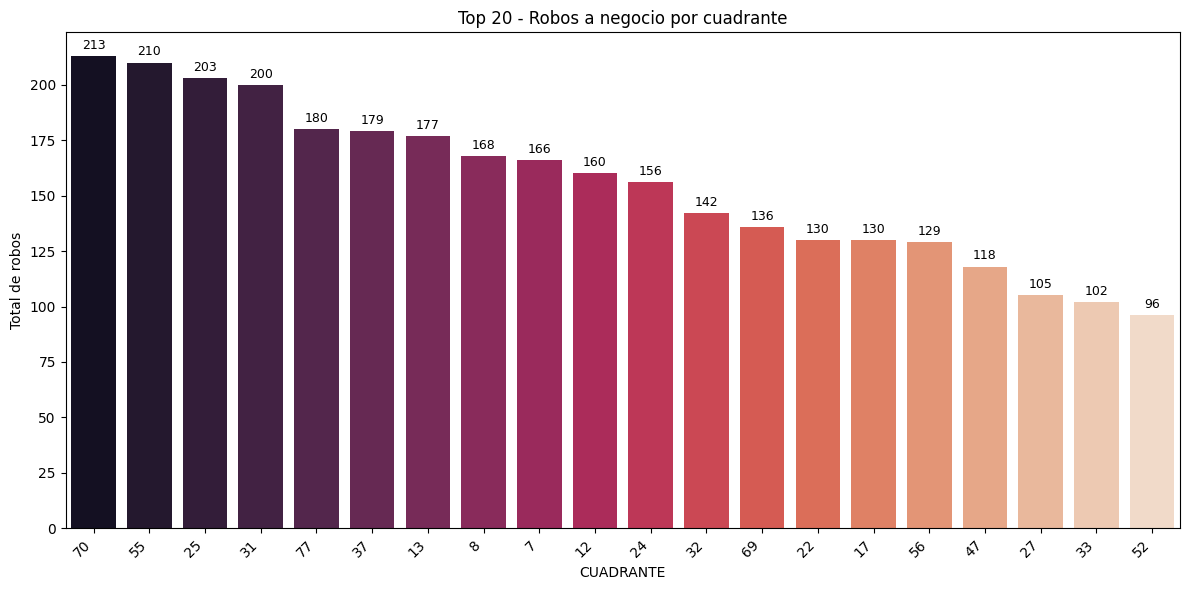

/tmp/ipykernel_8125/3352853544.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts, x='CUADRANTE', y='TOTAL', palette=palette, order=order)


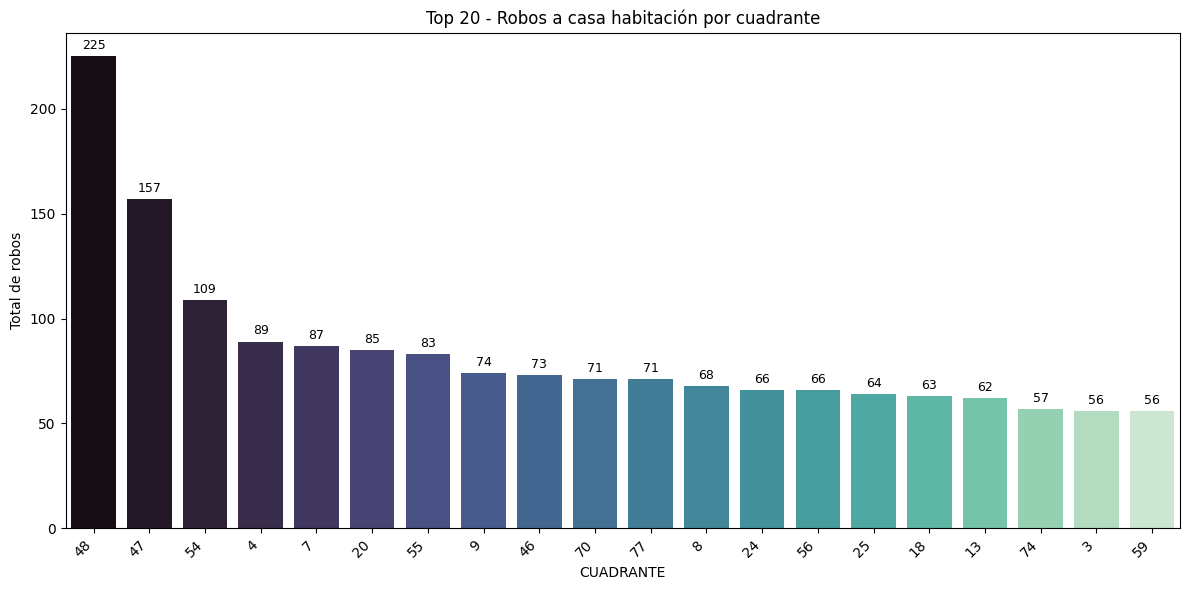

/tmp/ipykernel_8125/3352853544.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts, x='CUADRANTE', y='TOTAL', palette=palette, order=order)


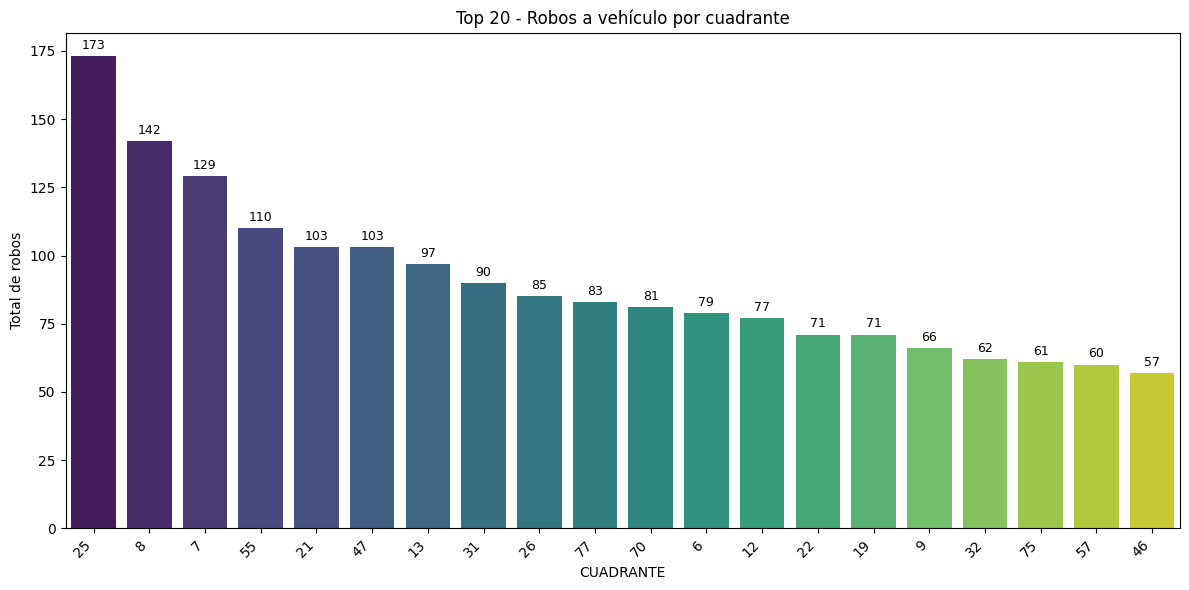

In [33]:

# Graficas por CUADRANTE para cada df (usa seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# ...existing code...
def plot_cuadrantes(df_subset, titulo, top_n=20, palette='viridis'):
    # Cuenta por cuadrante (ignora NaN)
    counts = df_subset.groupby('CUADRANTE').size().reset_index(name='TOTAL').dropna(subset=['CUADRANTE'])
    counts = counts.sort_values('TOTAL', ascending=False)
    if top_n:
        counts = counts.head(top_n)

    order = counts['CUADRANTE'].tolist()  # fijar orden explícito

    plt.figure(figsize=(12,6))
    ax = sns.barplot(data=counts, x='CUADRANTE', y='TOTAL', palette=palette, order=order)
    plt.title(titulo)
    plt.xlabel('CUADRANTE')
    plt.ylabel('Total de robos')
    plt.xticks(rotation=45, ha='right')

    # Anotar usando las patches (posiciones reales de las barras)
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f"{int(h):,}",
                    xy=(p.get_x() + p.get_width() / 2., h),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
# ...existing code...

# Llamadas para cada dataframe creado
plot_cuadrantes(df_negocio, 'Top 20 - Robos a negocio por cuadrante', top_n=20, palette='rocket')
plot_cuadrantes(df_casa,    'Top 20 - Robos a casa habitación por cuadrante', top_n=20, palette='mako')
plot_cuadrantes(df_calle,   'Top 20 - Robos a vehículo por cuadrante', top_n=20, palette='viridis')
# ...existing code...

In [34]:

# Comprobar qué cuadrantes no tienen robos de vehículo
all_cuads = sorted(df['CUADRANTE'].dropna().unique())
veh_cuads = sorted(df_calle['CUADRANTE'].dropna().unique())
sin_veh = [c for c in all_cuads if c not in veh_cuads]

print("Total cuadrantes (con datos):", len(all_cuads))
print("Cuadrantes con al menos 1 robo de vehículo:", len(veh_cuads))
print("Cuadrantes SIN robos de vehículo:", len(sin_veh))
print("Lista de cuadrantes sin robos de vehículo:", sin_veh)

# Resumen por cuadrante (total global y total de vehículo)
res = pd.DataFrame({'CUADRANTE': all_cuads})
res = res.merge(df.groupby('CUADRANTE').size().reset_index(name='TOTAL_GLOBAL'), on='CUADRANTE', how='left')
res = res.merge(df_calle.groupby('CUADRANTE').size().reset_index(name='TOTAL_VEHICULO'), on='CUADRANTE', how='left')
res['TOTAL_VEHICULO'] = res['TOTAL_VEHICULO'].fillna(0).astype(int)
res = res.sort_values(['TOTAL_VEHICULO','TOTAL_GLOBAL'], ascending=[False,False])
display(res)


Total cuadrantes (con datos): 75
Cuadrantes con al menos 1 robo de vehículo: 74
Cuadrantes SIN robos de vehículo: 1
Lista de cuadrantes sin robos de vehículo: [np.int64(64)]


,CUADRANTE,TOTAL_GLOBAL,TOTAL_VEHICULO
21,25,440,173
5,8,378,142
4,7,382,129
51,55,403,110
43,47,378,103
...,...,...,...
40,44,23,5
58,62,25,4
54,58,19,4
0,1,8,4



--- Tipo: vehículo ---
Cuadrantes con al menos 1 robo: 74
Cuadrantes SIN robos de vehículo: 1
Ejemplo de cuadrantes sin robos (primeros 10): [np.int64(64)]


,CUADRANTE,TOTAL_GLOBAL,TOTAL_VEHICULO
21,25,440,173
5,8,378,142
4,7,382,129
51,55,403,110
43,47,378,103
...,...,...,...
40,44,23,5
58,62,25,4
54,58,19,4
0,1,8,4


/tmp/ipykernel_8125/1352692574.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumen.sort_values(col_name, ascending=False),


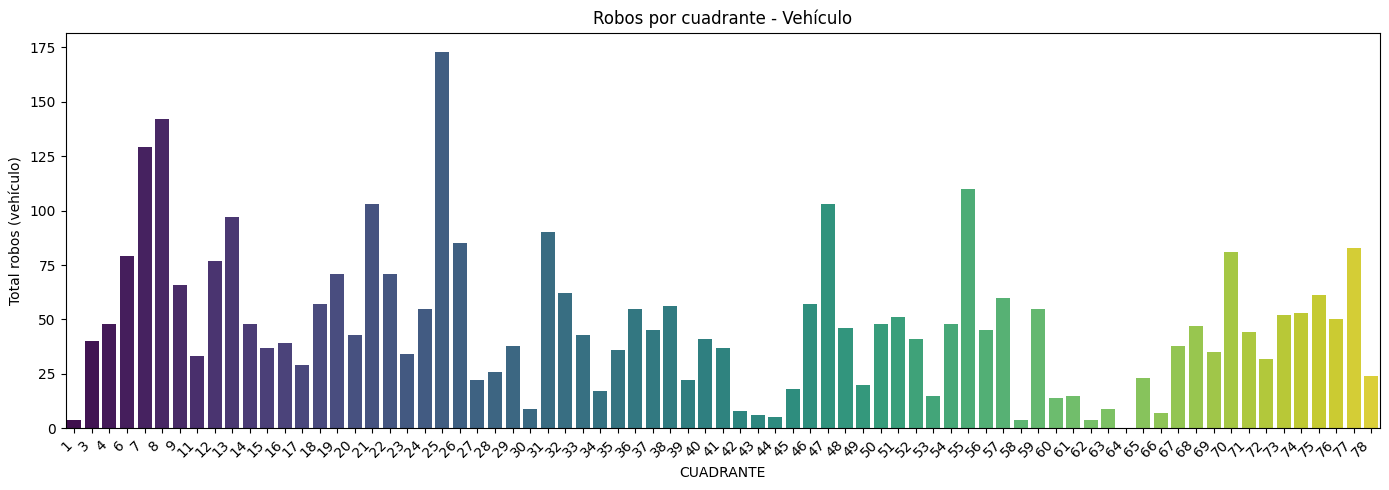


--- Tipo: negocio ---
Cuadrantes con al menos 1 robo: 75
Cuadrantes SIN robos de negocio: 0
Ejemplo de cuadrantes sin robos (primeros 10): []


,CUADRANTE,TOTAL_GLOBAL,TOTAL_NEGOCIO
66,70,365,213
51,55,403,210
21,25,440,203
27,31,338,200
73,77,334,180
...,...,...,...
38,42,17,7
39,43,9,3
60,64,5,3
54,58,19,2


/tmp/ipykernel_8125/1352692574.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumen.sort_values(col_name, ascending=False),


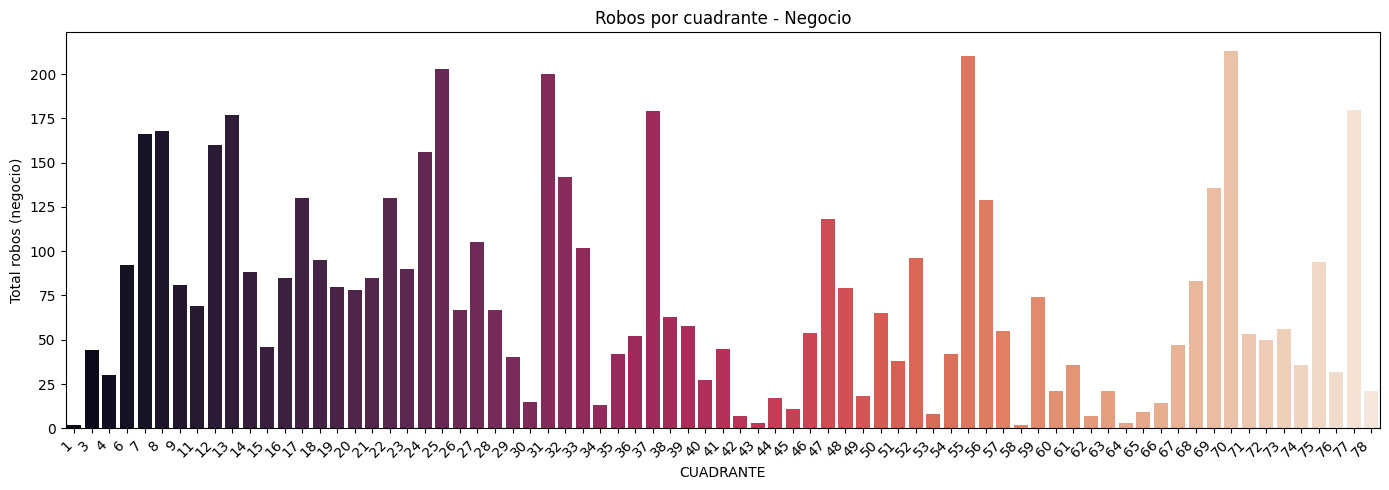


--- Tipo: casa ---
Cuadrantes con al menos 1 robo: 74
Cuadrantes SIN robos de casa: 1
Ejemplo de cuadrantes sin robos (primeros 10): [np.int64(43)]


,CUADRANTE,TOTAL_GLOBAL,TOTAL_CASA
44,48,350,225
43,47,378,157
50,54,199,109
2,4,167,89
4,7,382,87
...,...,...,...
38,42,17,2
0,1,8,2
60,64,5,2
40,44,23,1


/tmp/ipykernel_8125/1352692574.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumen.sort_values(col_name, ascending=False),


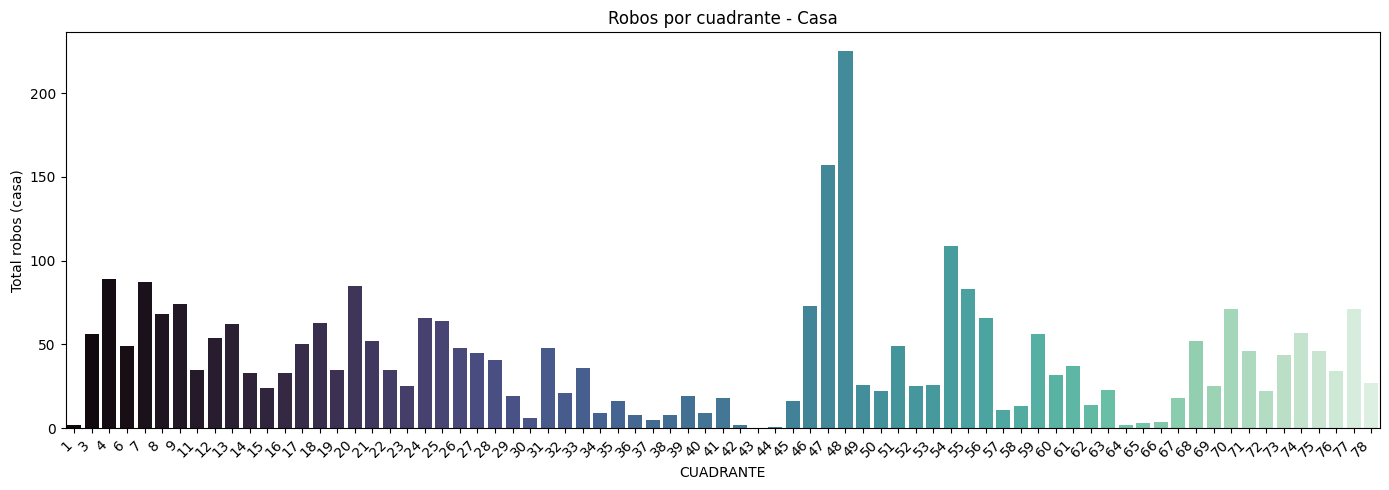

In [35]:

# Repetir la comprobación para los demás tipos (negocio y casa) y mostrar resumen + gráfica
all_cuads = sorted(df['CUADRANTE'].dropna().unique())

checks = [
    ("vehículo", df_calle, "TOTAL_VEHICULO", "viridis"),
    ("negocio",  df_negocio, "TOTAL_NEGOCIO",  "rocket"),
    ("casa",     df_casa,    "TOTAL_CASA",     "mako"),
]

for nombre, df_sub, col_name, palette in checks:
    type_cuads = sorted(df_sub['CUADRANTE'].dropna().unique())
    sin_tipo = [c for c in all_cuads if c not in type_cuads]

    print(f"\n--- Tipo: {nombre} ---")
    print("Cuadrantes con al menos 1 robo:", len(type_cuads))
    print(f"Cuadrantes SIN robos de {nombre}:", len(sin_tipo))
    # opcional: listar (comentar si es mucha salida)
    print("Ejemplo de cuadrantes sin robos (primeros 10):", sin_tipo[:10])

    # Resumen por cuadrante: total global y total por tipo
    resumen = pd.DataFrame({'CUADRANTE': all_cuads})
    resumen = resumen.merge(df.groupby('CUADRANTE').size().reset_index(name='TOTAL_GLOBAL'),
                            on='CUADRANTE', how='left')
    resumen = resumen.merge(df_sub.groupby('CUADRANTE').size().reset_index(name=col_name),
                            on='CUADRANTE', how='left')
    resumen[col_name] = resumen[col_name].fillna(0).astype(int)
    resumen = resumen.sort_values([col_name, 'TOTAL_GLOBAL'], ascending=[False, False])

    display(resumen)  # muestra la tabla completa; usar .head() si quieres sólo top

    # Gráfica: todos los cuadrantes (incluye 0), ordenada por total del tipo
    plt.figure(figsize=(14,5))
    sns.barplot(data=resumen.sort_values(col_name, ascending=False),
                x='CUADRANTE', y=col_name, palette=palette)
    plt.title(f"Robos por cuadrante - {nombre.capitalize()}")
    plt.xlabel("CUADRANTE")
    plt.ylabel(f"Total robos ({nombre})")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
# ...existing code...

/tmp/ipykernel_8125/1062006588.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=resumen, x='CUADRANTE', y='TOTAL', col='ESTACION',


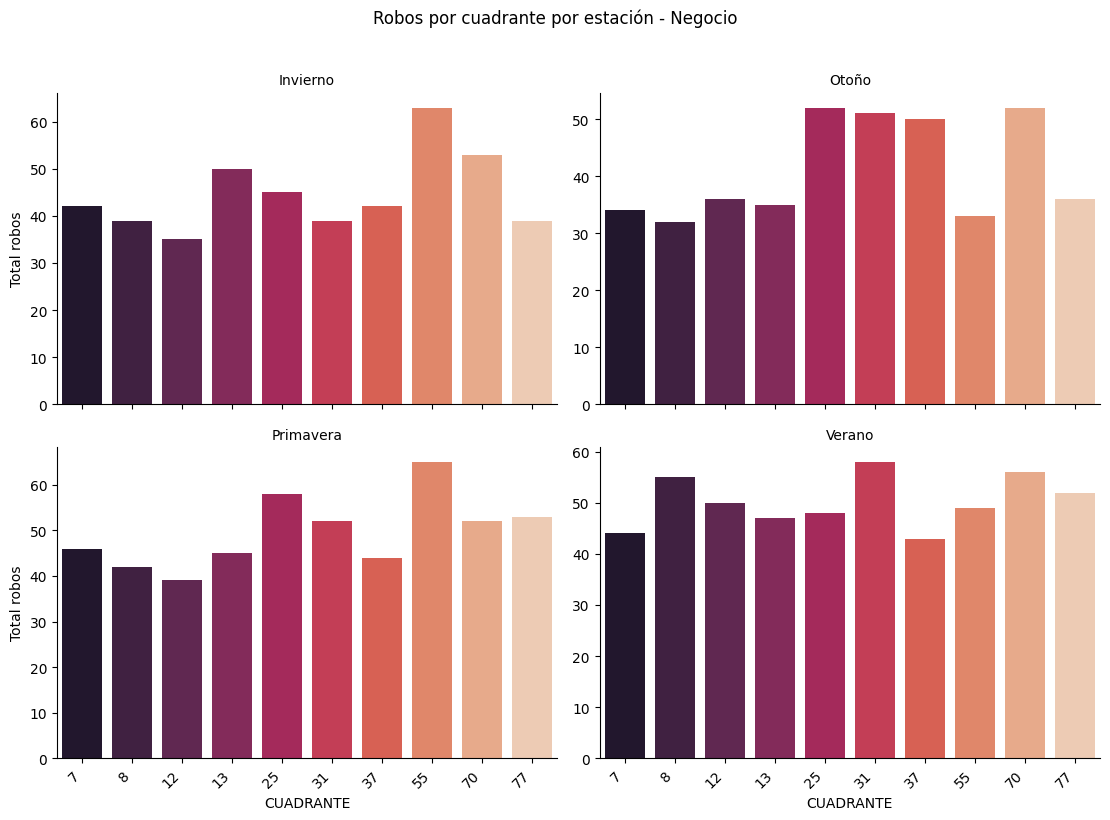

/tmp/ipykernel_8125/1062006588.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=resumen, x='CUADRANTE', y='TOTAL', col='ESTACION',


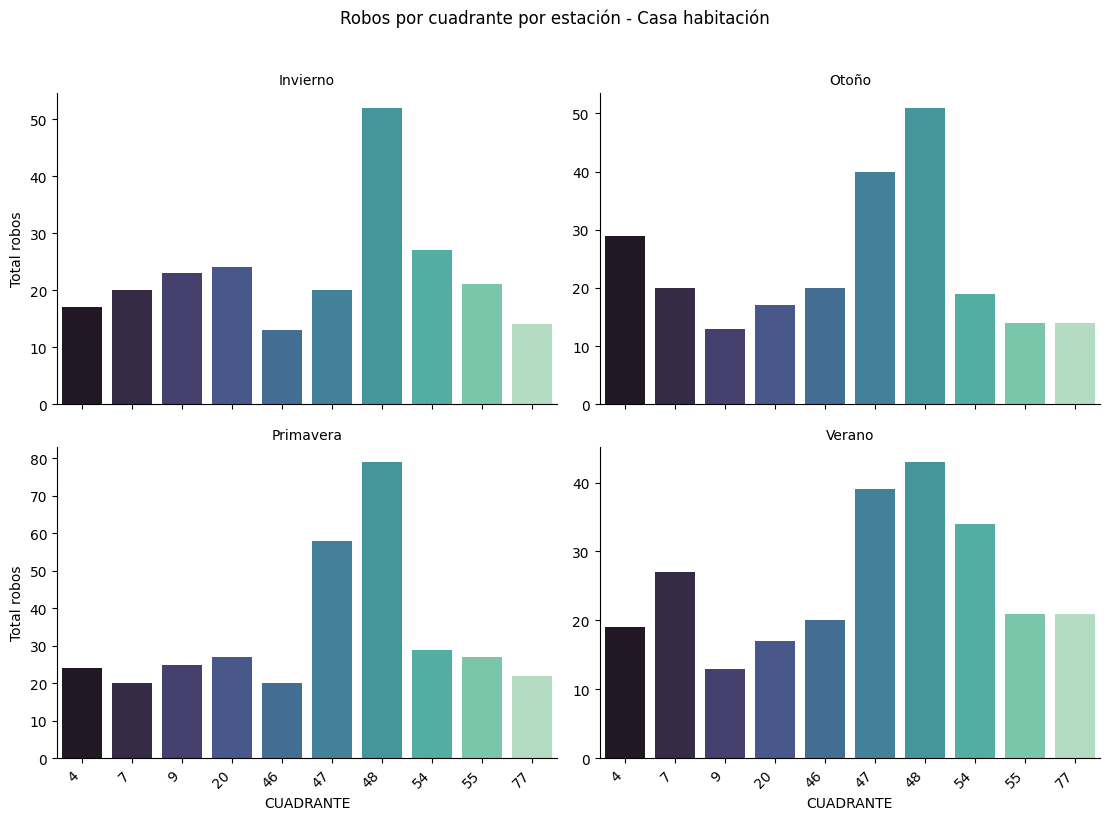

/tmp/ipykernel_8125/1062006588.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=resumen, x='CUADRANTE', y='TOTAL', col='ESTACION',


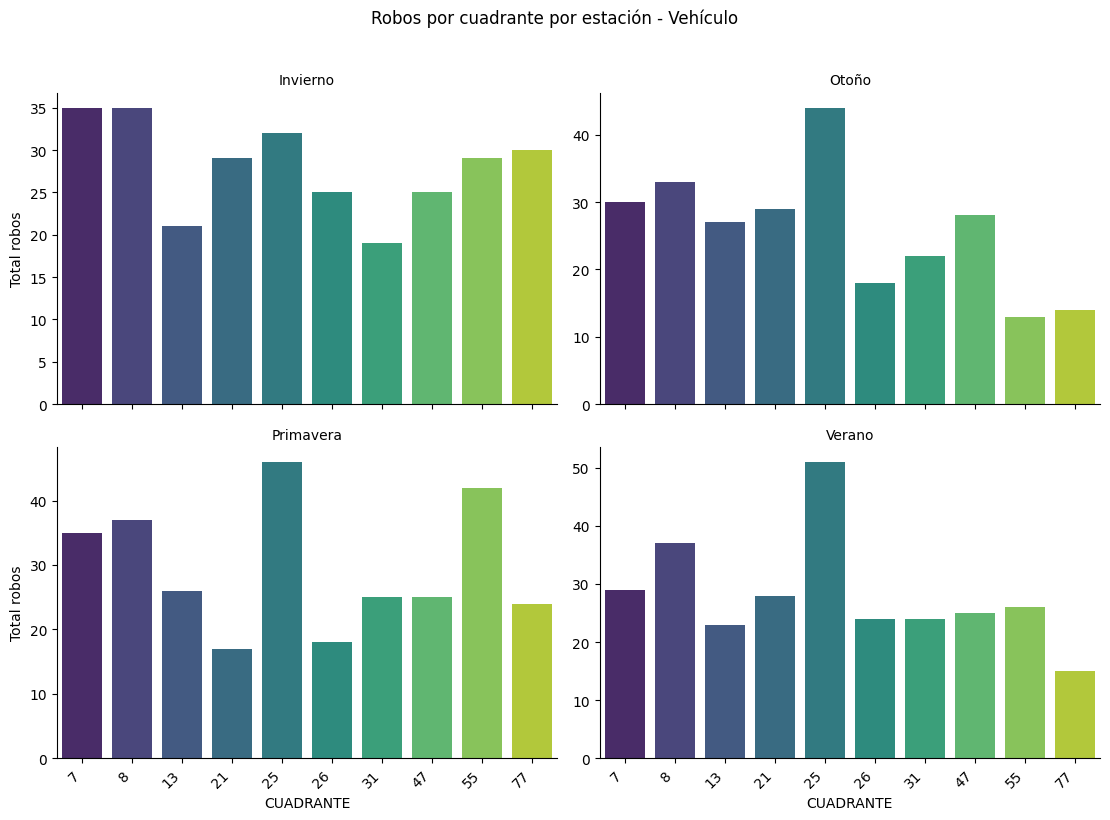

In [36]:
# Crear columna ESTACION a partir del mes (hemisferio norte)
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df['MES'] = df['FECHA'].dt.month

def mes_a_estacion(m):
    if pd.isna(m):
        return np.nan
    m = int(m)
    if m in (12, 1, 2):
        return 'Invierno'
    if m in (3, 4, 5):
        return 'Primavera'
    if m in (6, 7, 8):
        return 'Verano'
    return 'Otoño'

df['ESTACION'] = df['MES'].apply(mes_a_estacion)

# Recalcular dataframes por tipo (por si se modificó df)
df_negocio = df[df['TIPO'] == 'ROBO A NEGOCIO'].copy()
df_casa    = df[df['TIPO'] == 'ROBO A CASA HABITACION'].copy()
df_calle   = df[df['TIPO'] == 'ROBO DE VEHICULO'].copy()

# Totales por CUADRANTE y ESTACION + ranking
cuad_est = df.groupby(['CUADRANTE', 'ESTACION']).size().reset_index(name='TOTAL_POR_CUADRANTE_ESTACION')
cuad_est['RANK_CUADRANTE_ESTACION'] = cuad_est.groupby('ESTACION')['TOTAL_POR_CUADRANTE_ESTACION'] \
                                              .rank(method='dense', ascending=False).astype(int)

# Merge en cada df específico
df_negocio = df_negocio.merge(cuad_est, on=['CUADRANTE', 'ESTACION'], how='left')
df_casa    = df_casa.merge(cuad_est,    on=['CUADRANTE', 'ESTACION'], how='left')
df_calle   = df_calle.merge(cuad_est,   on=['CUADRANTE', 'ESTACION'], how='left')

# Rellenar NaN y ajustar tipos
for d in (df_negocio, df_casa, df_calle):
    if 'TOTAL_POR_CUADRANTE_ESTACION' in d.columns:
        d['TOTAL_POR_CUADRANTE_ESTACION'] = d['TOTAL_POR_CUADRANTE_ESTACION'].fillna(0).astype(int)
    if 'RANK_CUADRANTE_ESTACION' in d.columns:
        d['RANK_CUADRANTE_ESTACION'] = d['RANK_CUADRANTE_ESTACION'].fillna(0).astype(int)

# Función de graficado por estación (top N cuadrantes)
def plot_seasonal_top(df_sub, nombre, top_n=8, palette='rocket'):
    # elegir top_n cuadrantes por volumen total en el subset
    top_cuads = df_sub['CUADRANTE'].value_counts().dropna().head(top_n).index.tolist()
    resumen = df_sub.groupby(['ESTACION','CUADRANTE']).size().reset_index(name='TOTAL')
    resumen = resumen[resumen['CUADRANTE'].isin(top_cuads)]
    # graficar por estación usando facet
    g = sns.catplot(data=resumen, x='CUADRANTE', y='TOTAL', col='ESTACION',
                    kind='bar', col_wrap=2, sharey=False,
                    height=4, aspect=1.4, palette=palette,
                    order=None)
    g.set_titles("{col_name}")
    g.set_axis_labels("CUADRANTE", "Total robos")
    for ax in g.axes.flatten():
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
    plt.suptitle(f"Robos por cuadrante por estación - {nombre}", y=1.02)
    plt.tight_layout()
    plt.show()

# Generar gráficas
plot_seasonal_top(df_negocio, 'Negocio', top_n=10, palette='rocket')
plot_seasonal_top(df_casa,    'Casa habitación', top_n=10, palette='mako')
plot_seasonal_top(df_calle,   'Vehículo', top_n=10, palette='viridis')



--- Negocio ---


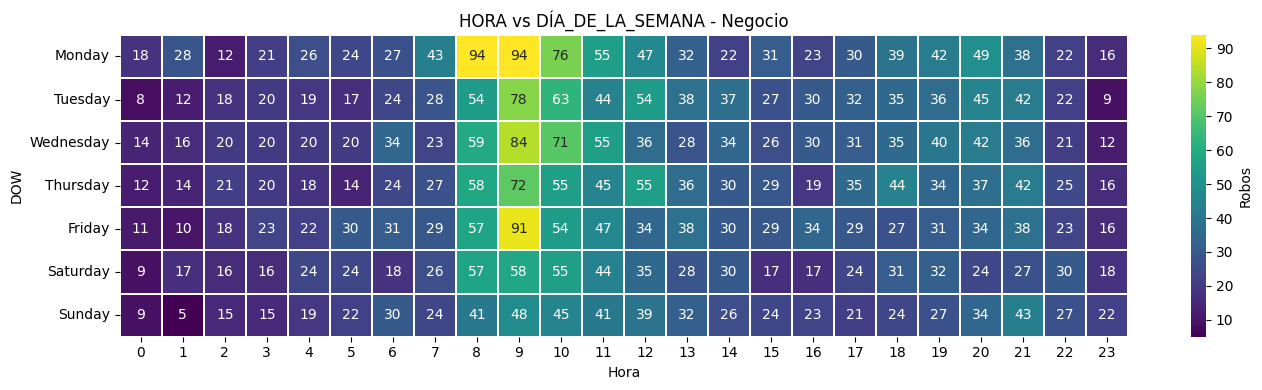

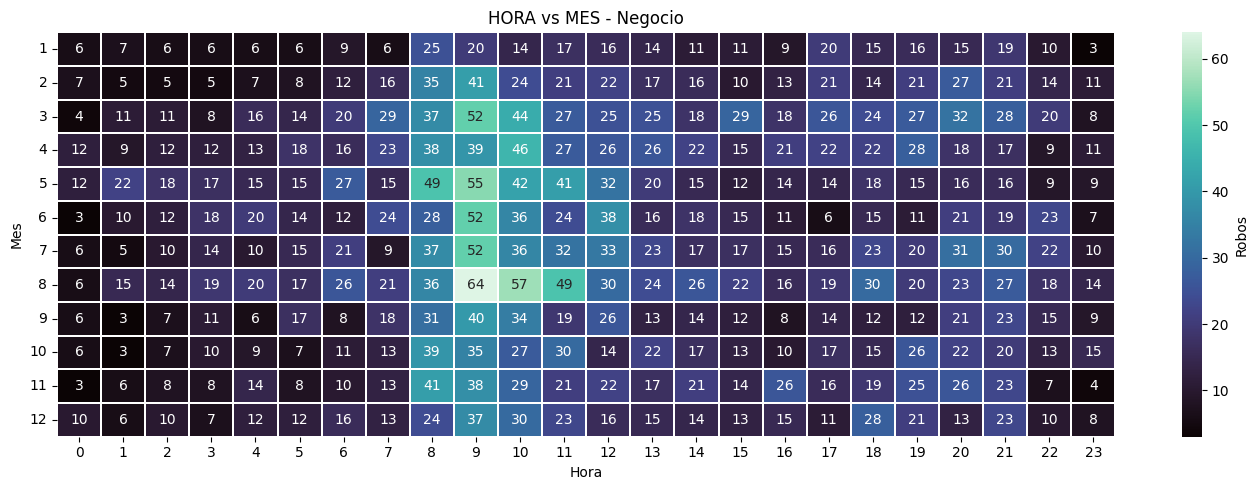


--- Casa habitación ---


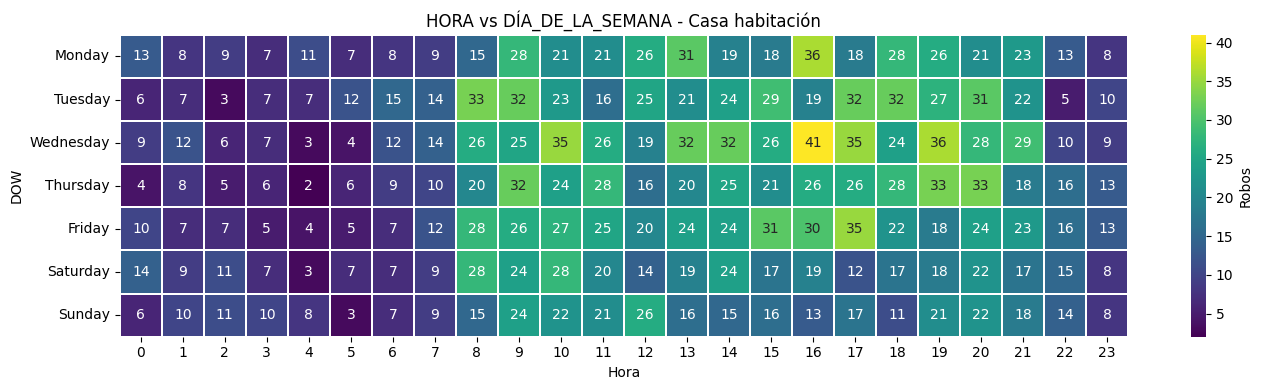

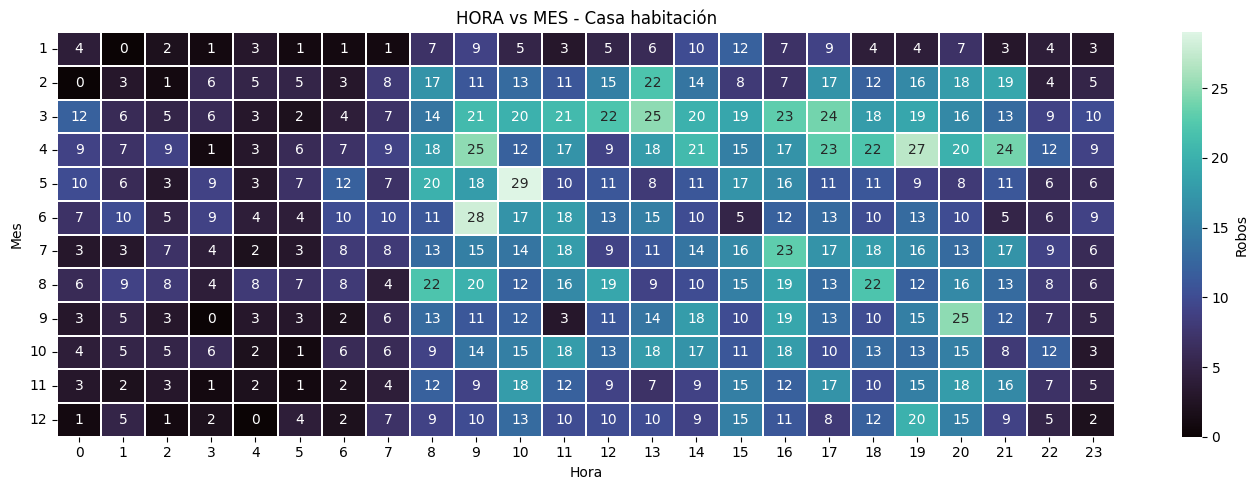


--- Vehículo ---


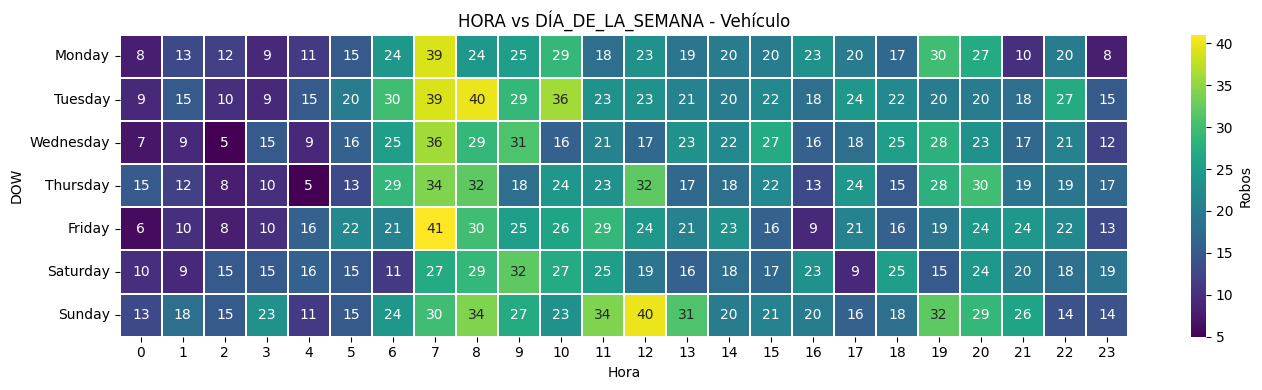

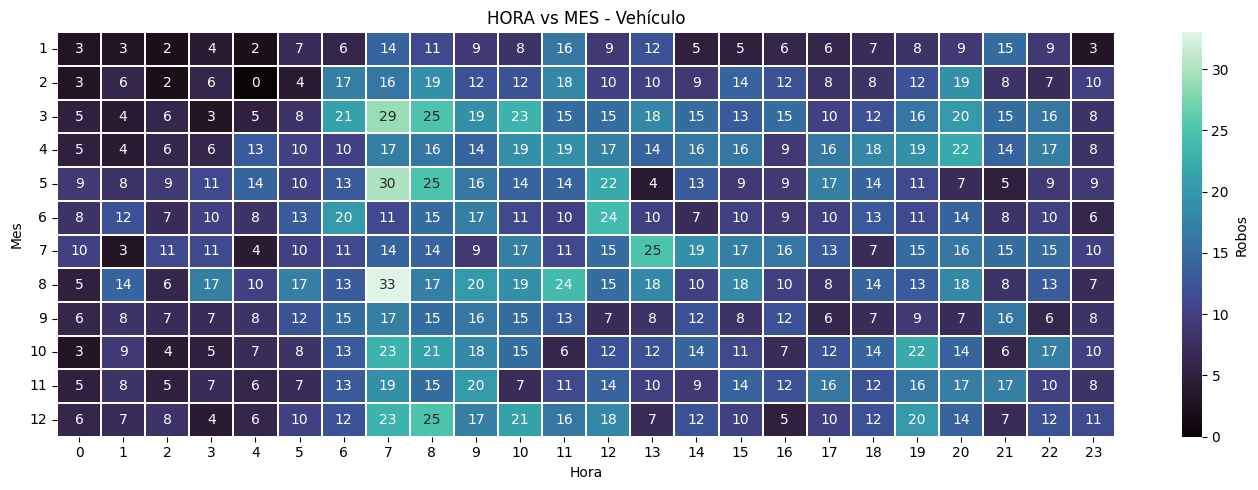

In [37]:
import calendar

# Asegurar columnas temporales
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df = df.dropna(subset=['FECHA']).copy()
df['MES'] = df['FECHA'].dt.month
df['DOW'] = df['FECHA'].dt.dayofweek  # 0=lunes .. 6=domingo
df['DIA_DE_LA_SEMANA'] = df['FECHA'].dt.day_name()
# normalizar HORA a int y filtrar valores plausibles
df['HORA'] = pd.to_numeric(df['HORA'], errors='coerce').dropna().astype(int)
df = df[(df['HORA'] >= 0) & (df['HORA'] <= 23)]

def plot_hour_vs_day(df_sub, nombre, cmap='viridis'):
    pivot = df_sub.groupby(['DOW','DIA_DE_LA_SEMANA','HORA']).size().reset_index(name='TOTAL')
    heat = pivot.pivot_table(index='DOW', columns='HORA', values='TOTAL', aggfunc='sum').fillna(0)
    # ordenar filas 0..6 y usar nombres legibles
    heat = heat.reindex(range(0,7)).fillna(0)
    day_labels = [calendar.day_name[d] for d in heat.index]
    plt.figure(figsize=(14,4))
    sns.heatmap(heat, cmap=cmap, annot=True, fmt='.0f', cbar_kws={'label':'Robos'}, linewidths=.3)
    plt.yticks(np.arange(len(day_labels))+0.5, day_labels, rotation=0)
    plt.xlabel('Hora')
    plt.title(f'HORA vs DÍA_DE_LA_SEMANA - {nombre}')
    plt.tight_layout()
    plt.show()

def plot_hour_vs_month(df_sub, nombre, cmap='mako'):
    pivot = df_sub.groupby(['MES','HORA']).size().reset_index(name='TOTAL')
    heat = pivot.pivot_table(index='MES', columns='HORA', values='TOTAL', aggfunc='sum').fillna(0)
    # asegurar meses 1..12
    heat = heat.reindex(range(1,13)).fillna(0)
    plt.figure(figsize=(14,5))
    sns.heatmap(heat, cmap=cmap, annot=True, fmt='.0f', cbar_kws={'label':'Robos'}, linewidths=.3)
    plt.yticks(np.arange(12)+0.5, [str(m) for m in range(1,13)], rotation=0)
    plt.xlabel('Hora')
    plt.ylabel('Mes')
    plt.title(f'HORA vs MES - {nombre}')
    plt.tight_layout()
    plt.show()

# Ejecutar para cada tipo
tipos = [
    ('Negocio', df[df['TIPO']=='ROBO A NEGOCIO']),
    ('Casa habitación', df[df['TIPO']=='ROBO A CASA HABITACION']),
    ('Vehículo', df[df['TIPO']=='ROBO DE VEHICULO']),
]

for nombre, df_sub in tipos:
    if df_sub.empty:
        print(f"No hay datos para {nombre}")
        continue
    print(f"\n--- {nombre} ---")
    plot_hour_vs_day(df_sub, nombre, cmap='viridis')
    plot_hour_vs_month(df_sub, nombre, cmap='mako')


In [38]:
# Sankey / Treemap: TIPO -> VIOLENCIA -> DISTRITO/CUADRANTE
import warnings
warnings.filterwarnings("ignore")

# comprobar columnas necesarias
for col in ('TIPO','VIOLENCIA','DISTRITO','CUADRANTE'):
    if col not in df.columns:
        raise ValueError(f"Falta columna necesaria en df: {col}")

# intentar usar plotly, si no está pedir instalación
try:
    import plotly.graph_objects as go
    import plotly.express as px
except Exception:
    raise ImportError("Instala plotly: pip install plotly\nLuego vuelve a ejecutar la celda.")

def plot_sankey(df_in, target='DISTRITO', title=None, top_n_targets=30):
    """
    Sankey TIPO -> VIOLENCIA -> target (DISTRITO o CUADRANTE).
    top_n_targets limita la cantidad de nodos en la última capa (por volumen).
    """
    if target not in ('DISTRITO','CUADRANTE'):
        raise ValueError("target debe ser 'DISTRITO' o 'CUADRANTE'")

    df_clean = df_in.dropna(subset=['TIPO','VIOLENCIA', target]).copy()

    # limitar últimos nodos a top N para evitar gráfico inflado
    top_targets = df_clean[target].value_counts().head(top_n_targets).index.tolist()
    df_clean = df_clean[df_clean[target].isin(top_targets)]

    # Agregar flujos
    link1 = df_clean.groupby(['TIPO','VIOLENCIA']).size().reset_index(name='value')
    link2 = df_clean.groupby(['VIOLENCIA', target]).size().reset_index(name='value')

    # construir lista de nodos únicos (orden: TIPO, VIOLENCIA, target)
    tipos = link1['TIPO'].unique().tolist()
    violencias = pd.unique(pd.concat([link1['VIOLENCIA'], link2['VIOLENCIA']])).tolist()
    targets = link2[target].unique().tolist()
    labels = tipos + violencias + targets
    label_to_idx = {lab:i for i,lab in enumerate(labels)}

    # links para TIPO -> VIOLENCIA
    sources, targets_idx, values = [], [], []
    for _, row in link1.iterrows():
        sources.append(label_to_idx[row['TIPO']])
        targets_idx.append(label_to_idx[row['VIOLENCIA']])
        values.append(int(row['value']))

    # links para VIOLENCIA -> target (ajustar índices: violencias indices ya están en labels)
    for _, row in link2.iterrows():
        sources.append(label_to_idx[row['VIOLENCIA']])
        targets_idx.append(label_to_idx[row[target]])
        values.append(int(row['value']))

    sankey = go.Figure(data=[go.Sankey(
        node = dict(label=labels, pad=15, thickness=20),
        link = dict(source=sources, target=targets_idx, value=values)
    )])
    sankey.update_layout(title_text = title or f"Sankey: TIPO → VIOLENCIA → {target}", font_size=10, height=600)
    sankey.show()


def plot_treemap(df_in, target='DISTRITO', title=None, top_n_targets=200):
    """
    Treemap jerárquico TIPO / VIOLENCIA / target.
    """
    if target not in ('DISTRITO','CUADRANTE'):
        raise ValueError("target debe ser 'DISTRITO' o 'CUADRANTE'")

    df_clean = df_in.dropna(subset=['TIPO','VIOLENCIA', target]).copy()
    # agregar y limitar targets muy raros si es necesario
    top_targets = df_clean[target].value_counts().head(top_n_targets).index.tolist()
    df_clean = df_clean[df_clean[target].isin(top_targets)]

    df_counts = df_clean.groupby(['TIPO','VIOLENCIA', target]).size().reset_index(name='TOTAL')
    fig = px.treemap(df_counts, path=['TIPO','VIOLENCIA', target], values='TOTAL',
                     color='TOTAL', color_continuous_scale='Viridis')
    fig.update_layout(title=title or f"Treemap: TIPO → VIOLENCIA → {target}", height=700)
    fig.show()


# Ejemplos de uso (ejecuta la que prefieras)
# Sankey por DISTRITO (limita últimos 30 distritos más frecuentes)
plot_sankey(df, target='DISTRITO', title="Sankey - TIPO → VIOLENCIA → DISTRITO", top_n_targets=30)

# Treemap por CUADRANTE
plot_treemap(df, target='CUADRANTE', title="Treemap - TIPO → VIOLENCIA → CUADRANTE", top_n_targets=200)


In [40]:
# Exportar el df creado a un archivo Excel
df.to_excel("data/IPH_robos_completo_2021-2025.xlsx", index=False)

In [41]:
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA,DIA_DE_LA_SEMANA,ESTACION,DOW
485,31992,2024-03-01,4,34,ROBO A NEGOCIO,NO,28.669359,-106.027356,Morelos,50,2024,3,1,Friday,Primavera,4
486,32400,2024-03-01,9,31,ROBO A NEGOCIO,NO,28.626746,-106.118646,Diana,32,2024,3,1,Friday,Primavera,4
487,32558,2024-03-01,11,35,ROBO DE VEHICULO,NO,28.716537,-106.093005,Colón,15,2024,3,1,Friday,Primavera,4
488,31989,2024-03-01,16,33,ROBO A CASA HABITACION,NO,28.646164,-106.079649,Villa,25,2024,3,1,Friday,Primavera,4
489,32938,2024-03-01,23,55,ROBO DE VEHICULO,NO,28.597802,-106.083305,Zapata,78,2024,3,1,Friday,Primavera,4
